In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy
import scipy
import math
import matplotlib as mpl
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import socket
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [3]:
# import socket
# socket.gethostname()

In [4]:
n_cpus = 4
#print('** epoch: {}'.format(mpd.get_epoch()))
if 'SLURM_CPUS_PER_TASK' in os.environ.keys():
    n_cpus = int(os.environ['SLURM_CPUS_PER_TASK'])
#
print(f'*** n_cpus: {n_cpus}')

*** n_cpus: 4


In [5]:
N_report_len = 180
end_dtm = dtm.datetime(2023,9,26)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#delim_sacct='|'
delim_sacct='*'
partition='serc'
#partition=None
group=None
s_user=None
verbose=0
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_sherlock_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file [{os.path.isfile(sacct_h5_file)}]: {sacct_h5_file}')

*** dates: 2023-03-30 - 2023-09-26
*** sacct_h5_file [False]: sacct_data/sacct_sherlock_pSERC_gNONE_uNone_20230330_20230926.h5


In [6]:
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** Fetching SACCT data directly
***  2023-03-30 00:00:00+00:00 <class 'datetime.datetime'> 2023-09-26 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --partition=serc  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  5962250 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDis

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3070: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3070: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2892: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2892: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2892: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2892: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', l

** writing HDF5: sacct_data/sacct_sherlock_pSERC_gNONE_uNone_20230330_20230926.h5
*** DEBUG: updating column [index], type=<i8
*** DEBUG: updating column [User], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Group], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [GID], type=('|S6', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Account], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobID], type=('|S77', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobIDRaw], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Partition], type=('|S4', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [State], type=('|S19', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Timelimit], type=<f8
*** DEBUG: updating column [NCPUS], type=<i8
*** DEBUG: updating column [ReqMem], type=<f8
*** DEBUG: updating column [NNodes], type=<i8
*** DEBUG: updating column [Submit], type=<f8
*** DEBUG: updati

In [7]:
SP=hpc_lib.SH_PART_obj()

In [42]:
print(f'*** Cols: {SACCT_obj.jobs_summary.dtype.names}')
print(f'*** CPUs: {SP.get_total_cpus(partitions="serc")}')
print(f'*** GPUs: {SP.get_total_gpus(partitions="serc")}')

*** Cols: ('index', 'User', 'Group', 'GID', 'Account', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'ReqMem', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')
*** CPUs: 9104
*** GPUs: 92


In [9]:
n_cpus_serc = SP.get_total_cpus(partitions='serc')
n_gpus_serc = SP.get_total_gpus(partitions='serc')
#
print(f'** n_cpus: {n_cpus_serc}, n_gpus: {n_gpus_serc}')
#
print('*** ', SP.SP)

** n_cpus: 9104, n_gpus: 92
***         partition_name partition_public  nodes_idle  nodes_total  \
normal         normal              yes           1          179   
bigmem         bigmem              yes           0            9   
gpu               gpu              yes           3           26   
dev               dev              yes           2            4   
hns               hns               no           0          105   
serc             serc               no           2          233   
owners         owners               no          24         1471   

        cpu_cores_idle  cpu_cores_total  cpu_cores_queued  gpus_idle  \
normal            1540             4820             14805          0   
bigmem             310              504                54          0   
gpu                350              748               137         35   
dev                 87              104                 0         62   
hns                396             3728             13384          0  

In [10]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
# my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
# print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    
#
print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])


**  [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'), ('NGPUs', '<i8')]
**  <class 'str'>
**  index <i8
**  User |O
**  Group |O
**  GID |O
**  Account |O
**  JobID |O
**  JobIDRaw |O
**  Partition |O
**  State |O
**  Timelimit <f8
**  NCPUS <i8
**  ReqMem <f8
**  NNodes <i8
**  Submit <f8
**  Eligible <f8
**  Start <f8
**  End <f8
**  Elapsed <f8
**  SystemC

*** DEBUG t_now: 19626.465667146527, t_max: 19626.452118055557


/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3498: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lbls)


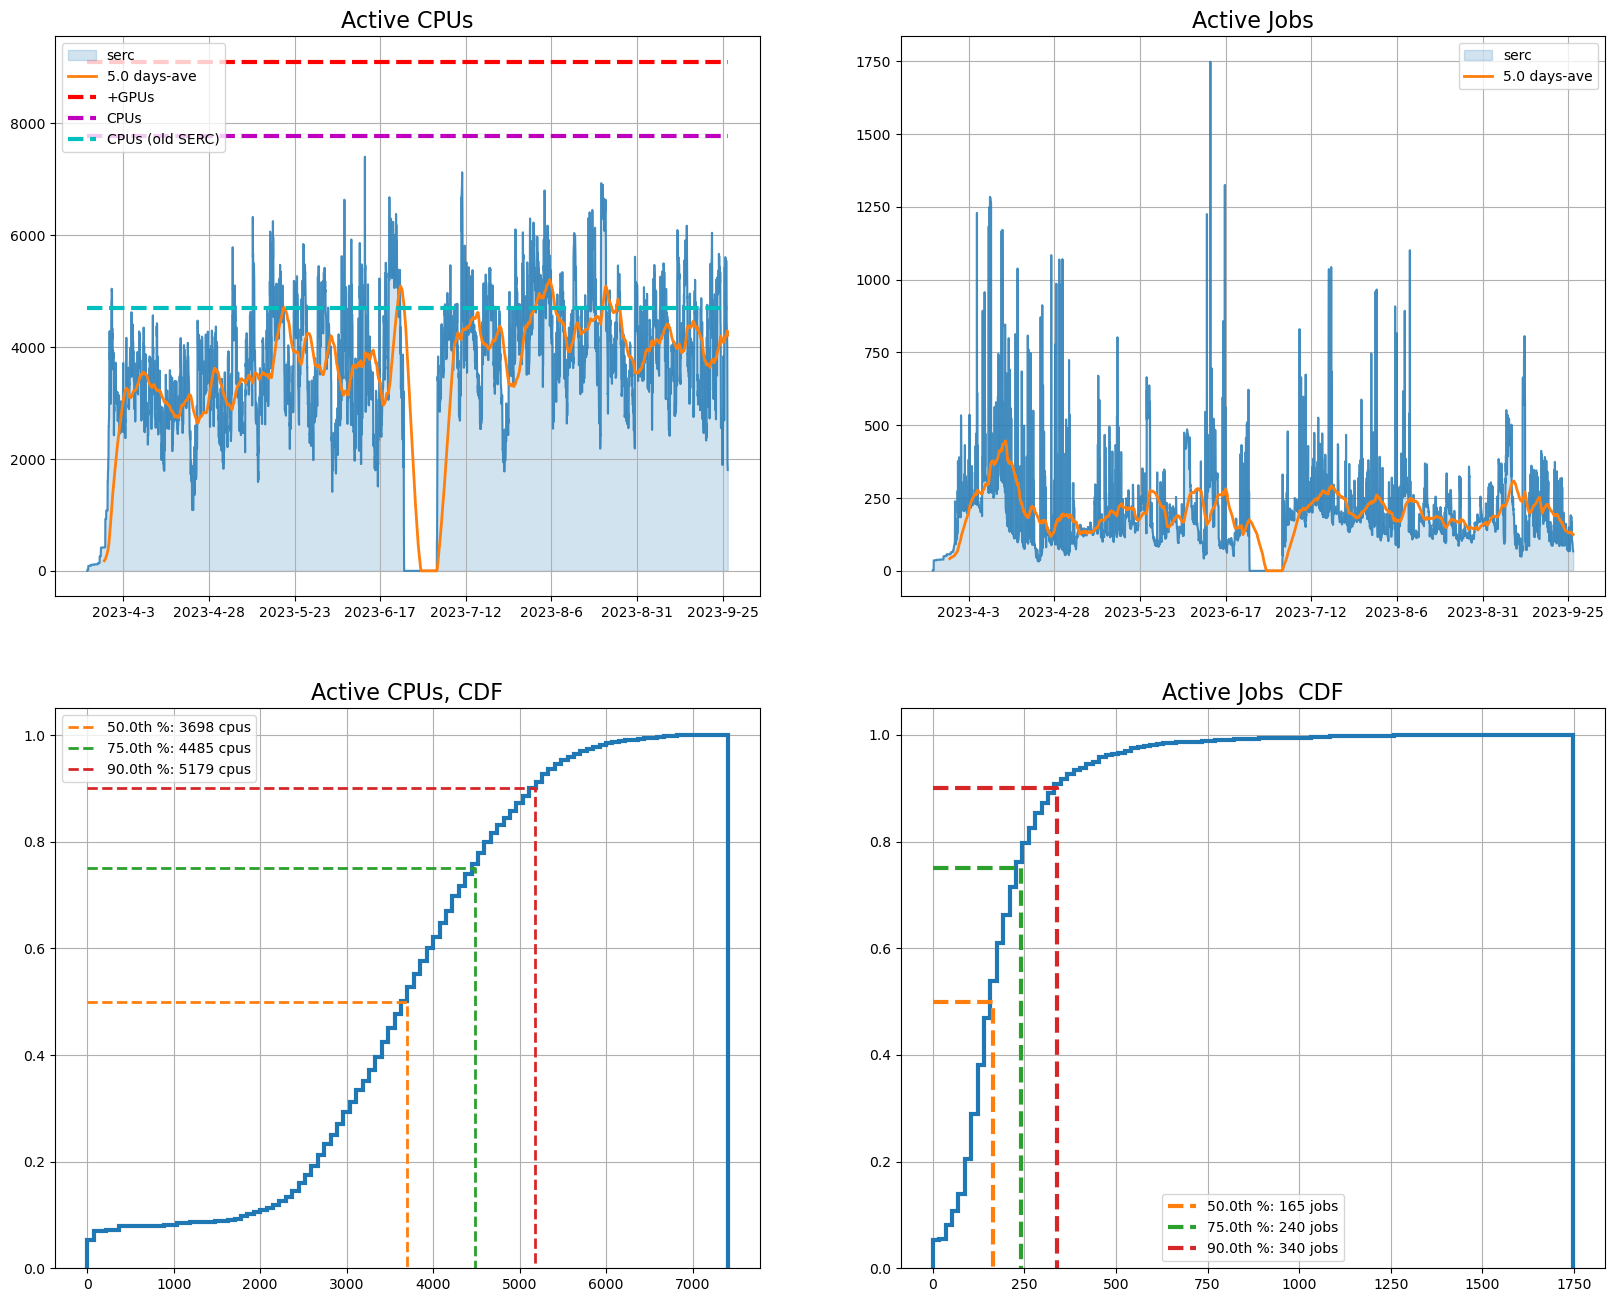

In [11]:
rep_cpu_lc = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')
#
# plot total CPUs in partition. Also, subtract CPUs associated with GPUs. For now, this is just
#. something we know. we will need to work harder to get it from data.
ax = rep_cpu_lc.axes[0]
ln = ax.lines[0]
#
x_max_cpus = numpy.array([ax.lines[0].get_xdata()[0], ax.lines[0].get_xdata()[-1]])
ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc, ls='--', lw=3.,
       color='r', label='+GPUs')

ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24), ls='--', lw=3.,
       color='m', label='CPUs')
#
ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24 + 96*32), ls='--', lw=3.,
       color='c', label='CPUs (old SERC)')

ax.legend(loc='upper left')

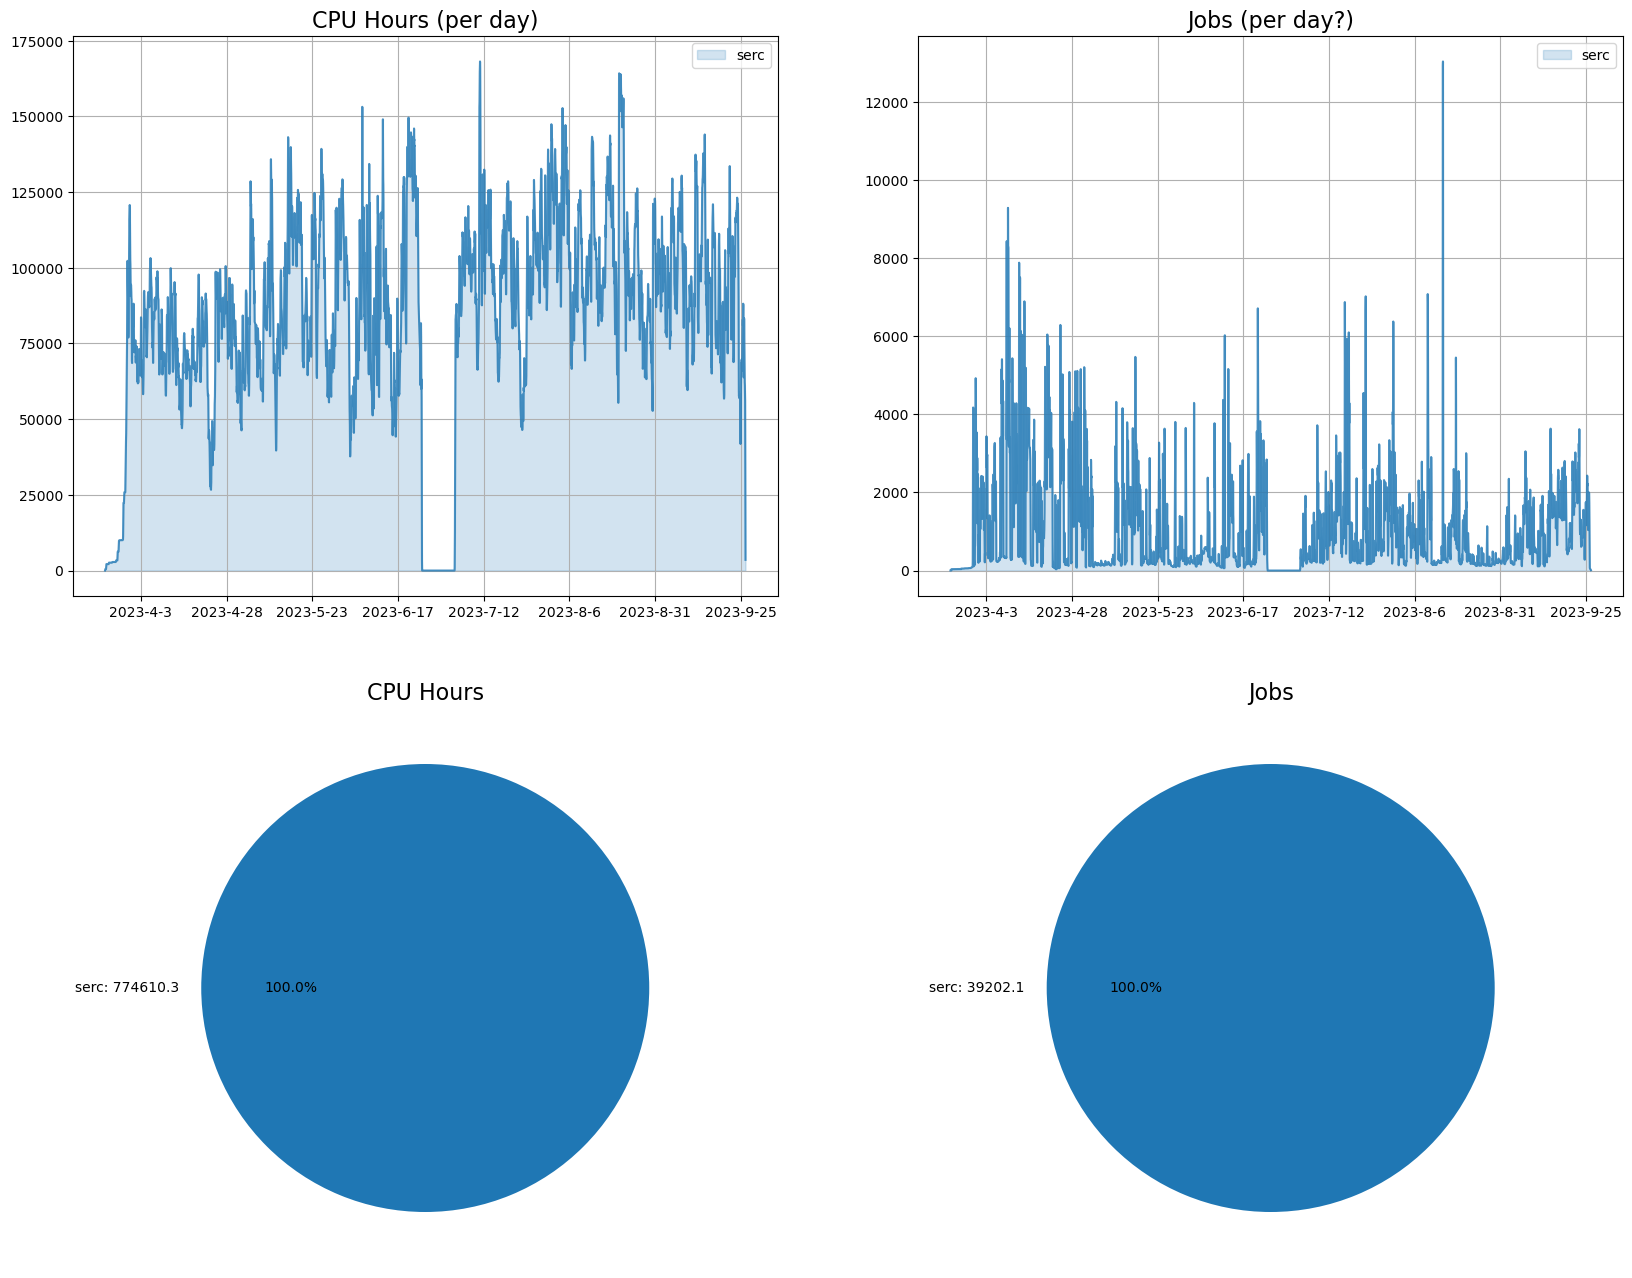

In [12]:
fg_cpuhlc = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Partition', autopct='%1.1f%%')

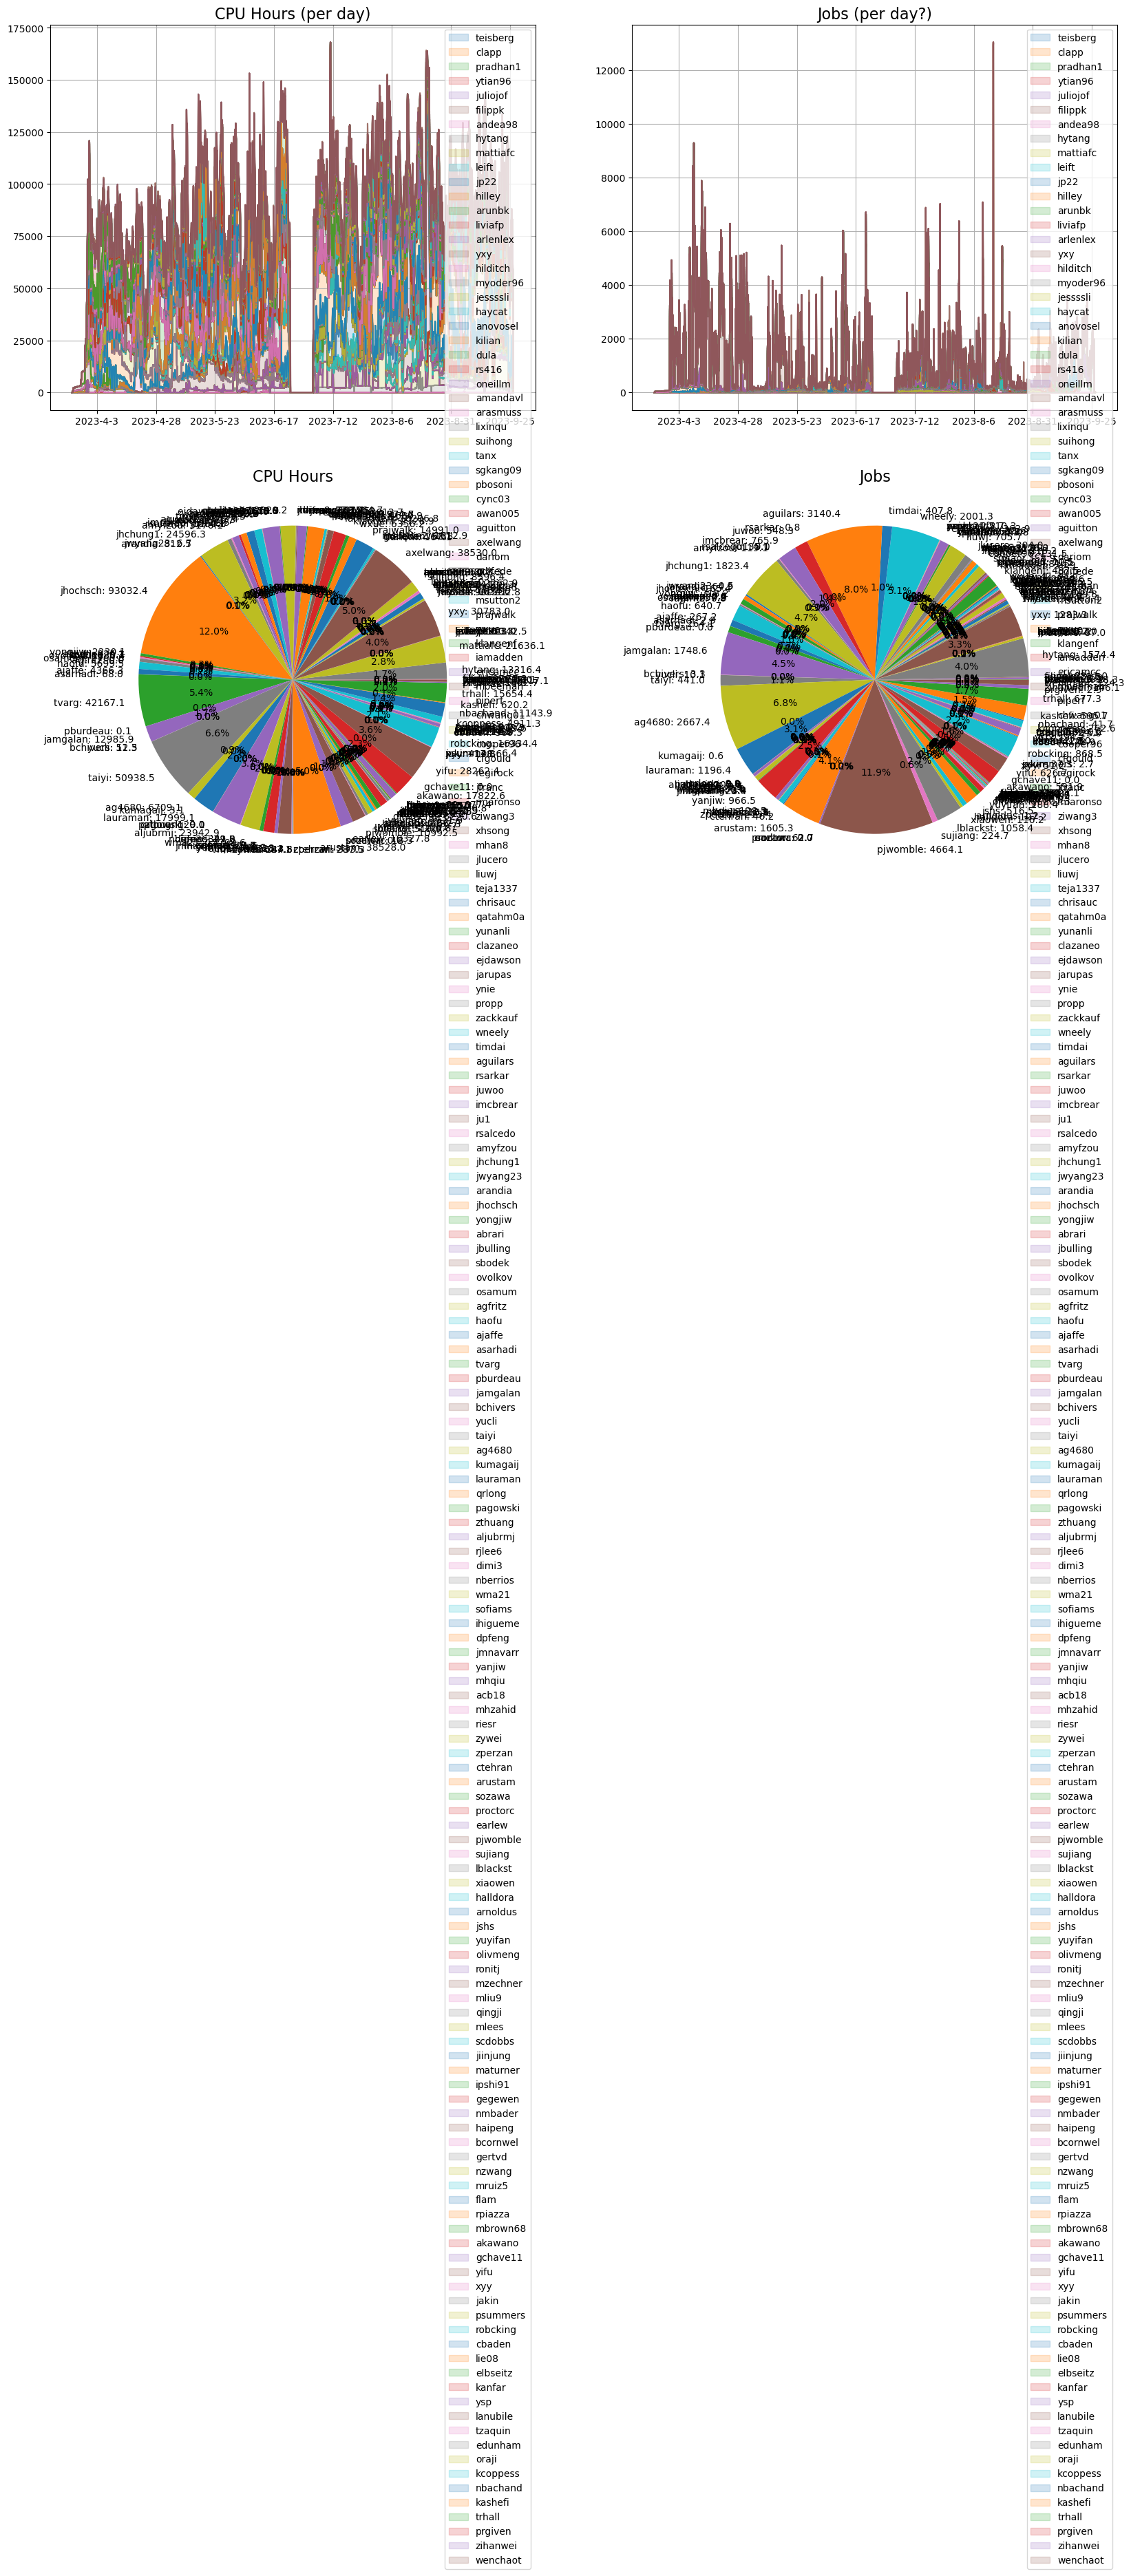

In [13]:
fg_cpuhl_u = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='User', autopct='%1.1f%%')

*** DEBUG t_now: 19626.467914886296, t_max: 19626.452118055557


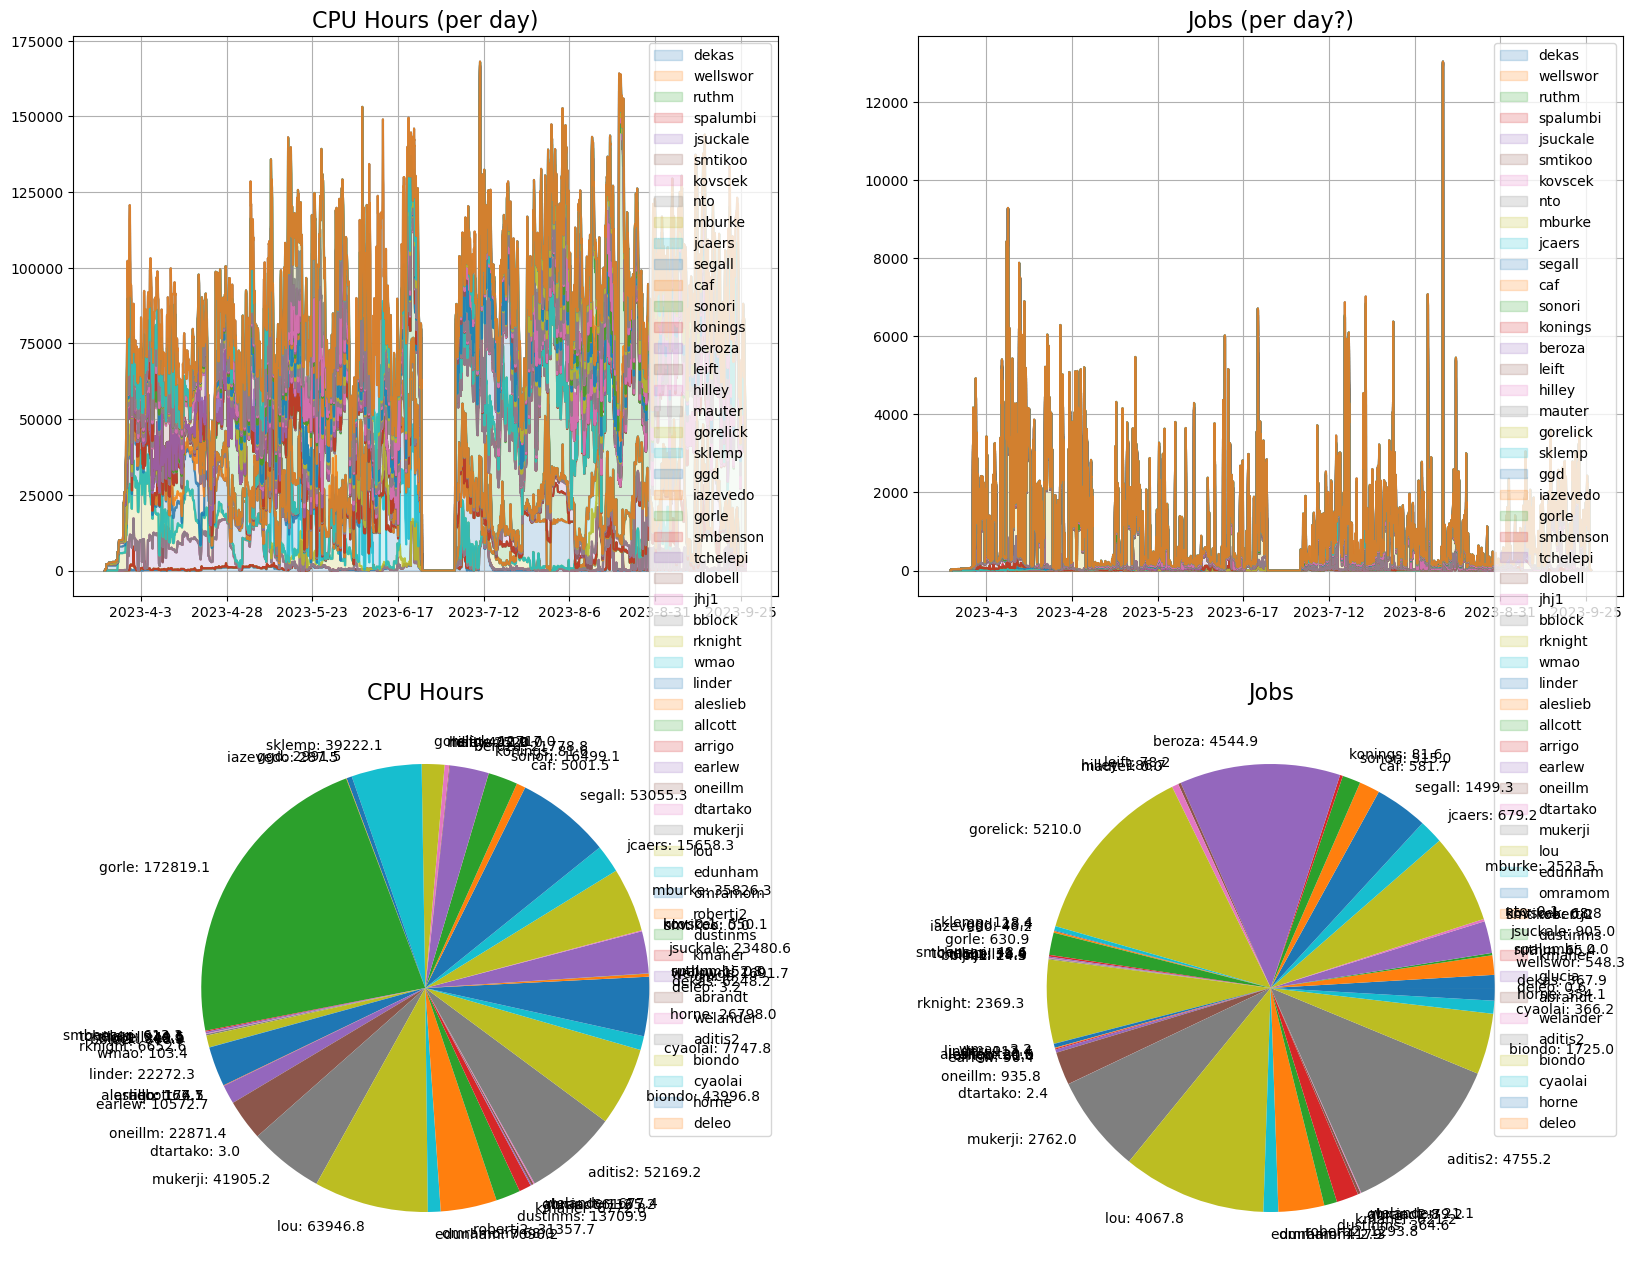

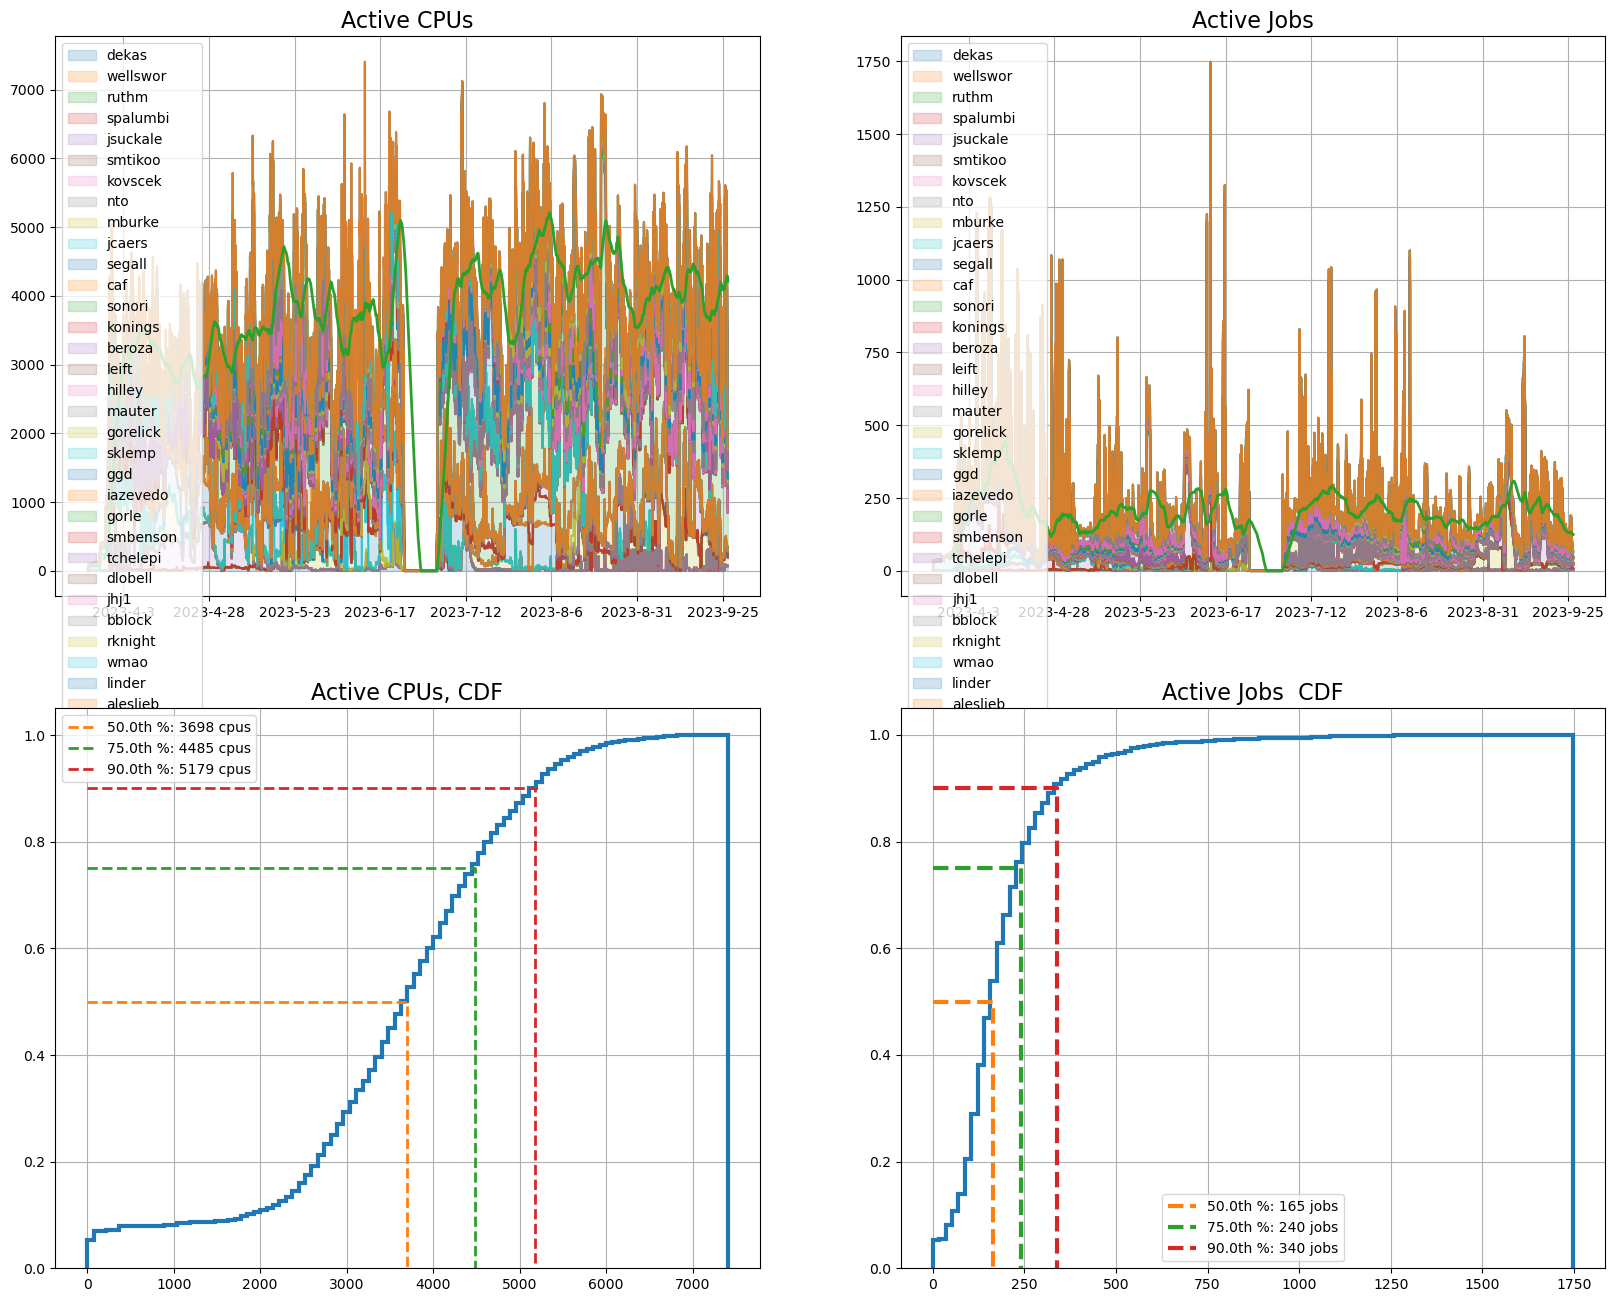

In [14]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Account')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Account')

### User stat table
- Generate a table of summary user stats

In [17]:
#
cpuh_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'],
                                       slice_data=SACCT_obj['User'])
jobs_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
#

*** CPU-hours: 
Name;cpu-hours;job-hours;n_jobs;last_job_start;Group;Accounts;Partitions
jhochsch;93032.36721064815;165.3776388888889;492;2023-09-25 22:20:41+00:00;gorle;gorle;serc
taiyi;50938.53068287037;440.9615046296297;185;2023-09-01 20:45:33+00:00;segall;segall;serc
tvarg;42167.0862962963;264.1302314814815;439;2023-09-25 13:07:15+00:00;gorle;gorle;serc
axelwang;38529.950208333335;106.45351851851851;138;2023-09-07 11:28:20+00:00;sklemp;sklemp;serc
arustam;38527.955;1605.331458333333;3273;2023-09-25 14:05:45+00:00;biondo;biondo;serc
yxy;30782.96611111111;1283.3034722222224;599;2023-09-25 15:32:48+00:00;robertj2;robertj2;serc
yifu;28262.44546296296;626.7445138888888;1336;2023-09-06 18:39:57+00:00;lou;lou;serc
jhchung1;24596.28920138889;1823.3825000000002;40275;2023-09-25 23:53:27+00:00;mukerji;mukerji;serc
aljubrmj;23942.853067129632;105.62087962962964;426;2023-09-25 01:47:32+00:00;horne;horne;serc
mattiafc;21636.149988425925;87.0178125;319;2023-09-25 17:20:15+00:00;gorle;gorle;serc


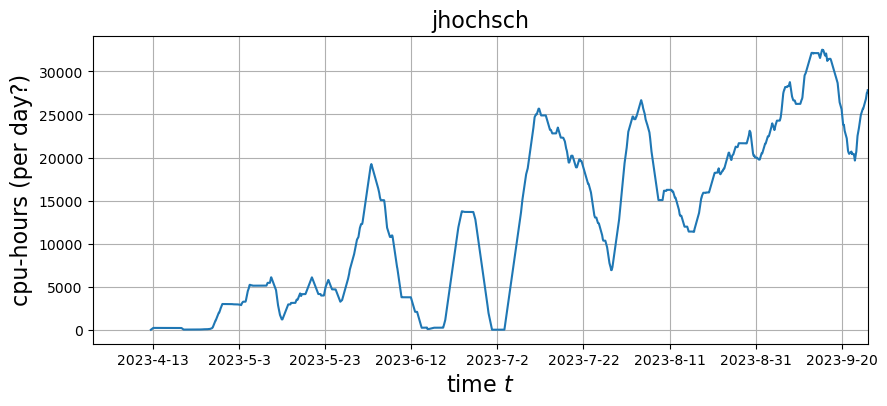

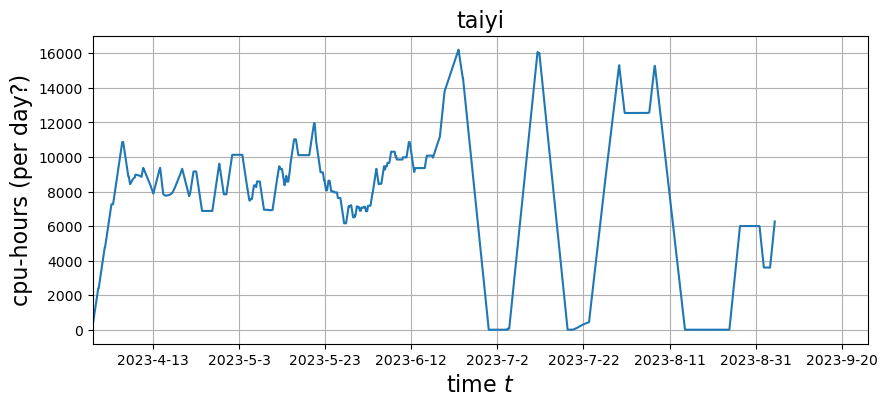

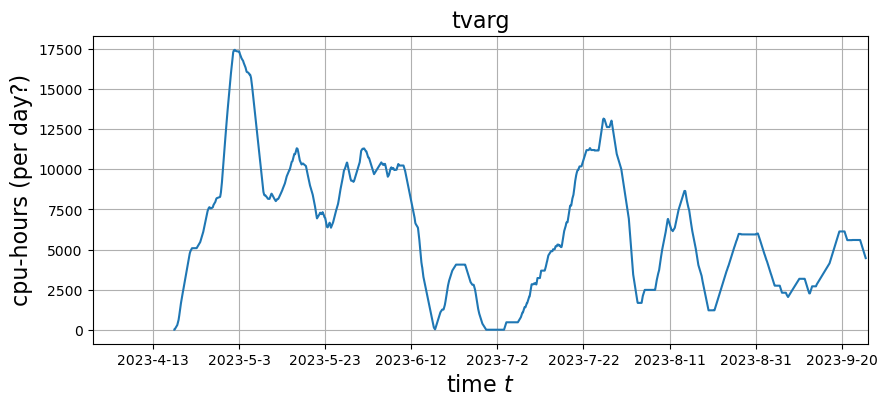

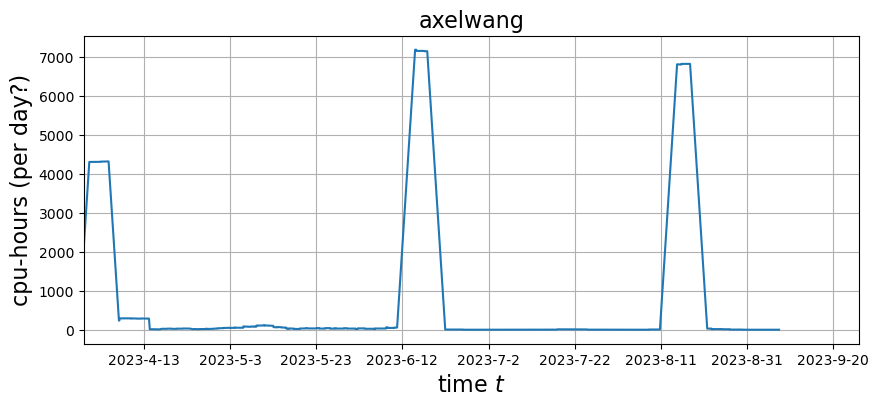

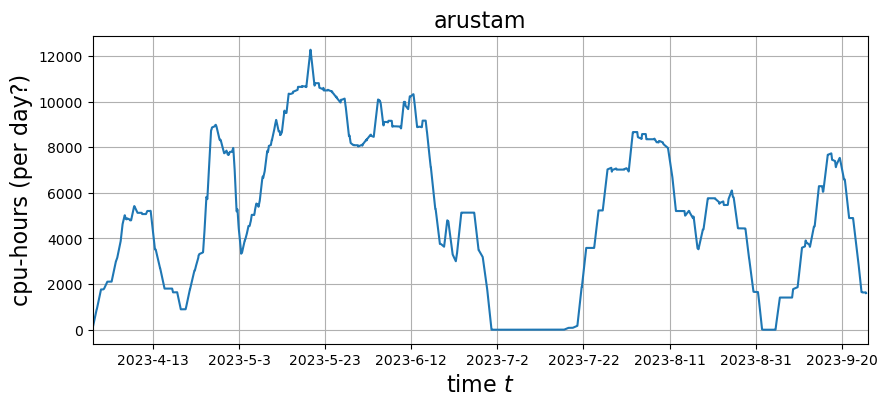

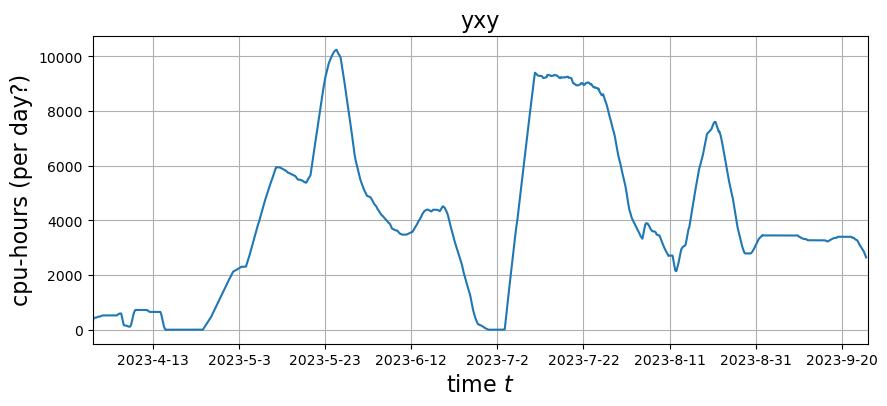

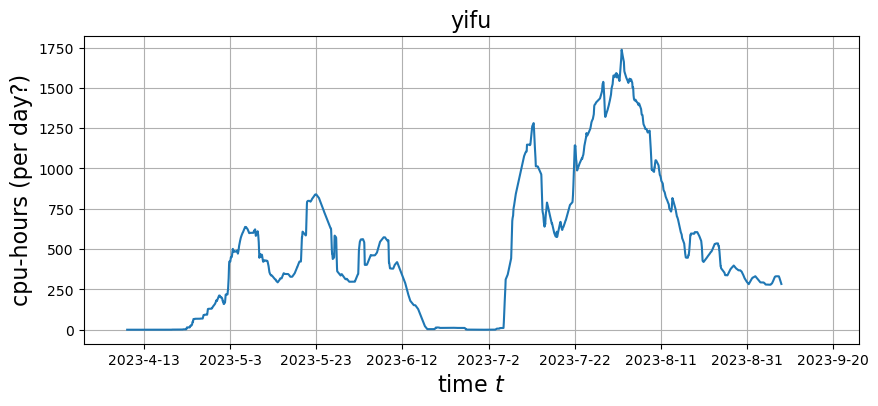

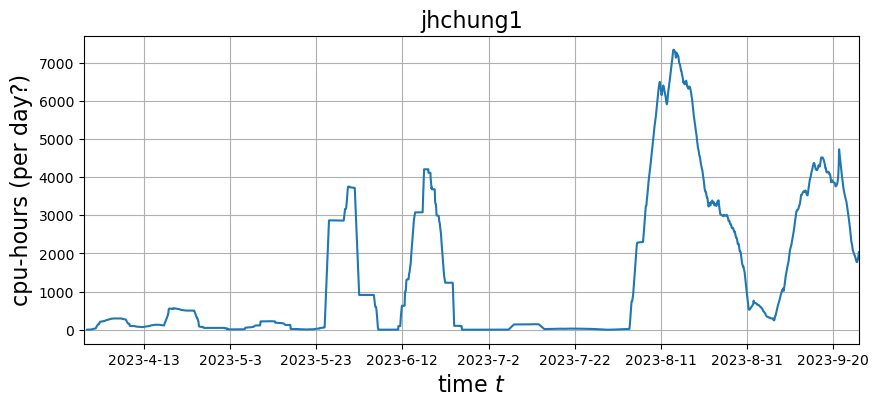

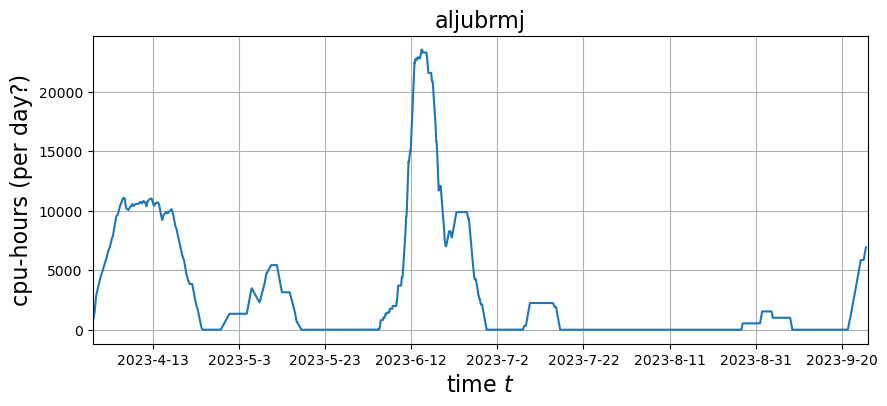

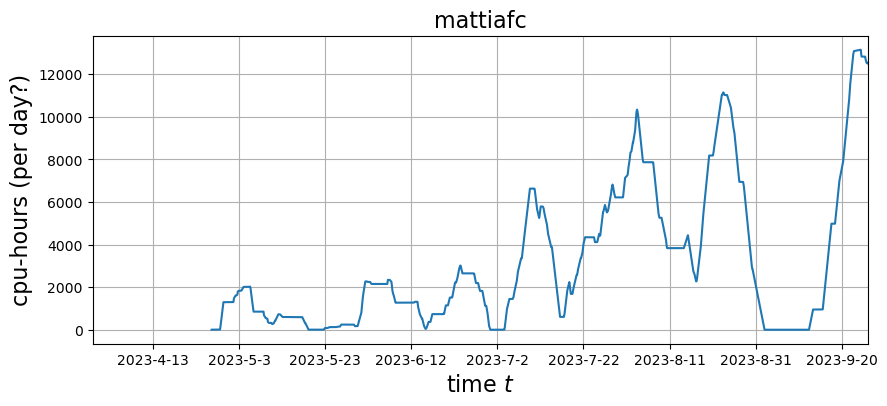

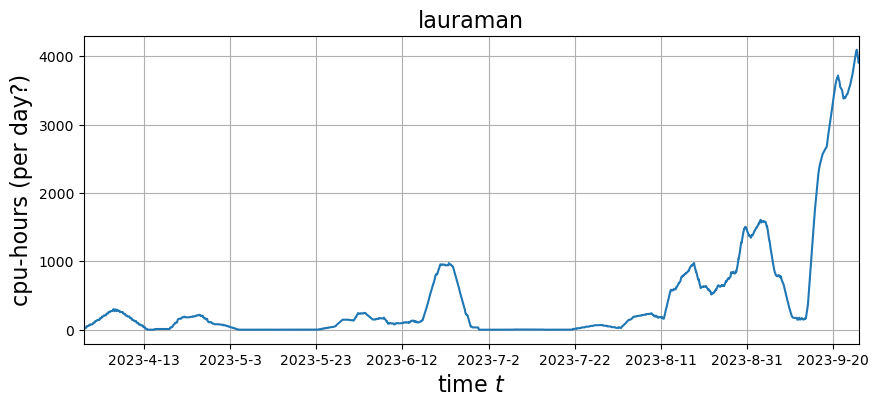

In [18]:
# This will be way too big to produce in notebooks, practically speaking at least..
# or maybe not, but we should do it last?
t0 = mpd.date2num(start_date)
t1 = mpd.date2num(end_date)
delim = chr(9)
delim = ';'
print('*** CPU-hours: ')
#print('**  Name,   cpu-hours,    job-hours,  last_job_start', )
print(delim.join(['Name', 'cpu-hours', 'job-hours', 'n_jobs', 'last_job_start', 'Group', 'Accounts', 'Partitions']))
jindex = {nm:k for k,nm in enumerate(jobs_pie_user['name'].astype(str))}
#print('** jindex: ', jindex)
for k, (nm,n) in enumerate(cpuh_pie_user[numpy.argsort(cpuh_pie_user['value'])[::-1]] ):
    if k>10: break
    #
    ix = SACCT_obj['User'].astype(type(nm)) == nm
    fg = plt.figure(figsize=(10,4))
    ax = fg.add_subplot(1,1,1)
    z = SACCT_obj.get_cpu_hours(jobs_summary=SACCT_obj[ix])
    ax.plot(z['time'], z['cpu_hours'], ls='-', marker='')
    ax.set_xlim(t0,t1)
    ax.grid()
    ax.set_xlabel('time $t$', size=16)
    ax.set_ylabel('cpu-hours (per day?)', size=16)
    #
    if isinstance(nm,bytes):
        nm = nm.decode()
    #
    ax.set_title(nm, size=16)
    #
    fg.canvas.draw()
    dt_epoch = hpc_lib.compute_mpd_epoch_dt(z['time'][0])
    lbls = [hpc_lib.simple_date_string(mpd.num2date(x + dt_epoch)) for x in ax.get_xticks()]
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_value()))) + dt_epoch) )
#               for s in ax.get_xticklabels()]

    #
    #ax.set_xticklabels(lbls)
    # This should get rid of the FixedLocator warning? But I'm not sure it will...
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(lbls)
    #
    rw_vals = [nm, n, jobs_pie_user['value'][jindex[nm]], numpy.sum(ix).astype(int),\
          (None if numpy.isnan(numpy.nanmax(numpy.nanmax(SACCT_obj['Start'][ix]))) else mpd.num2date(numpy.nanmax(SACCT_obj['Start'][ix])) ),\
           SACCT_obj['Group'][ix].astype(str)[0],\
                ','.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str)),\
                ','.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))]
    print(delim.join([str(x) for x in rw_vals]))
#     print(f"{nm.decode()}, {n}, {jobs_pie_user['value'][jindex[nm]]},\
#           {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix].astype(str)[0]},\
#                 {delim.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str))},\
#                 {delim.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))}\
#                 ")
#
# print('*** Jobs-time:')
# print('**  Name,   n_jobs,   last_job_start')
# for nm,n in jobs_pie_user[numpy.argsort(jobs_pie_user['value'])[::-1]]:
#     ix = SACCT_obj['User'].astype(type(nm)) == nm
#     print(f"**  {nm.decode()}, {n}, {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix][0]}")

In [19]:
print('** ', ax)
print('** ', ax.get_xticklabels()[0].get_position()[0])
print('** ', ax.get_xticks())

**  Axes(0.125,0.11;0.775x0.77)
**  19440.0
**  [19440. 19460. 19480. 19500. 19520. 19540. 19560. 19580. 19600. 19620.
 19640.]


In [20]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
# NOTE: for up and coming "how busy is the queue?" reporting, something like this:
# squeue -p serc --Format=jobid,jobarrayid,partition,username,state,timeused,timeleft,allocnodes,numnodes,numcpus


In [21]:
cpuh_jobs = SACCT_obj.get_cpu_hours(bin_size=1., n_points=5000)

In [22]:
cpuh_layers = SACCT_obj.get_cpu_hours_layer_cake(bin_size=1.)

***  [('time', '>f8'), ('serc', '>f8')]
***  [19439.49637731 19439.53377594 19439.57117457 19439.6085732
 19439.64597183 19439.68337045 19439.72076908 19439.75816771
 19439.79556634 19439.83296497]


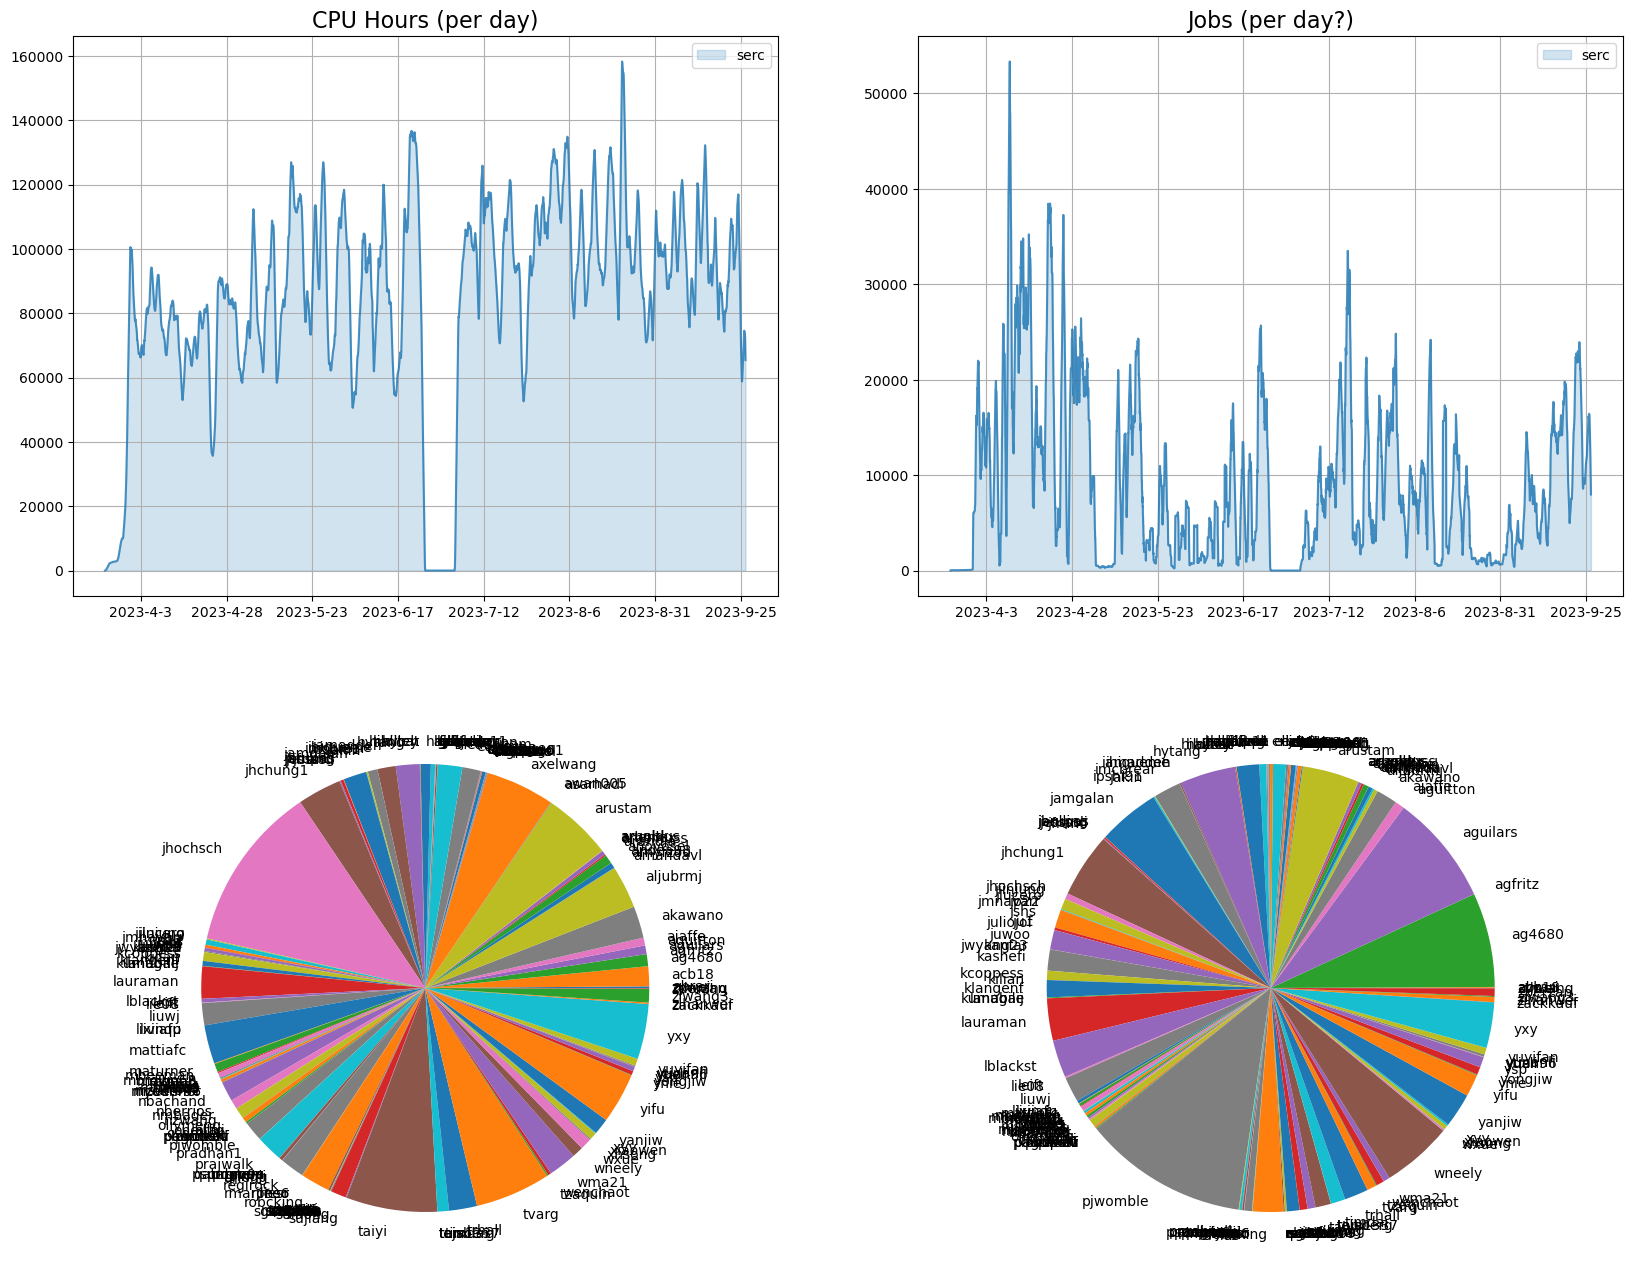

In [23]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
jobs = cpuh_layers['jobs']
T = cpuh['time']

print('*** ', cpuh.dtype)
print('*** ', cpuh['time'][0:10])

#
z_cpuh = hpc_lib.plot_layer_cake(data=cpuh, layers=cpuh.dtype.names[1:], time_col='time', ax=ax1)
z_jobs = hpc_lib.plot_layer_cake(data=jobs, layers=cpuh.dtype.names[1:], time_col='time', ax=ax2)
#
# pi charts. left: cpu-hours, right job-time
pi_cpuh = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'], slice_data=SACCT_obj['User'])
pi_cpuh_lbls = pi_cpuh['name']
pi_cpuh_vls  = pi_cpuh['value']

pi_jobs = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
pi_jobs_lbls = pi_jobs['name']
pi_jobs_vls  = pi_jobs['value']
#
ax3.pie(pi_cpuh_vls, labels=pi_cpuh_lbls)
ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
ax1.legend(loc=0)
ax2.legend(loc=0)
#
# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) + SACCT_obj.dt_mpd_epoch ) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
#fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#         for s in ax1.get_xticklabels()]
#ax1.set_xticklabels(lbls)


### SERC GPU activity

In [24]:
# serc_h5 = 'sacct_data/serc_sacct_20211126_20220525.h5'
# SACCT_serc = hpc_lib.SACCT_data_from_h5(serc_h5, keep_raw_data=False, n_cpu=n_cpus)

# serc_gpu_activity = SACCT_serc.active_jobs_cpu(jobs_summary=None, bin_size=1., 
#                                                NCPUs=SACCT_serc.get_NGPUs())

SACCT_serc = SACCT_obj

### GPUs:
For now, hijack the SACCT.get_active_cpus_layer_cake() function, but force the "CPUs" column to use GPUs.

In [25]:
gpu_layers = SACCT_serc.get_active_cpus_layer_cake(layer_field='Account', NCPUs=SACCT_serc.get_NGPUs())

*** DEBUG t_now: 19626.487622943416, t_max: 19626.452118055557


/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:722: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if NCPUs is None or NCPUs=='':


*** keys():  dict_keys(['N_cpu', 'N_jobs'])


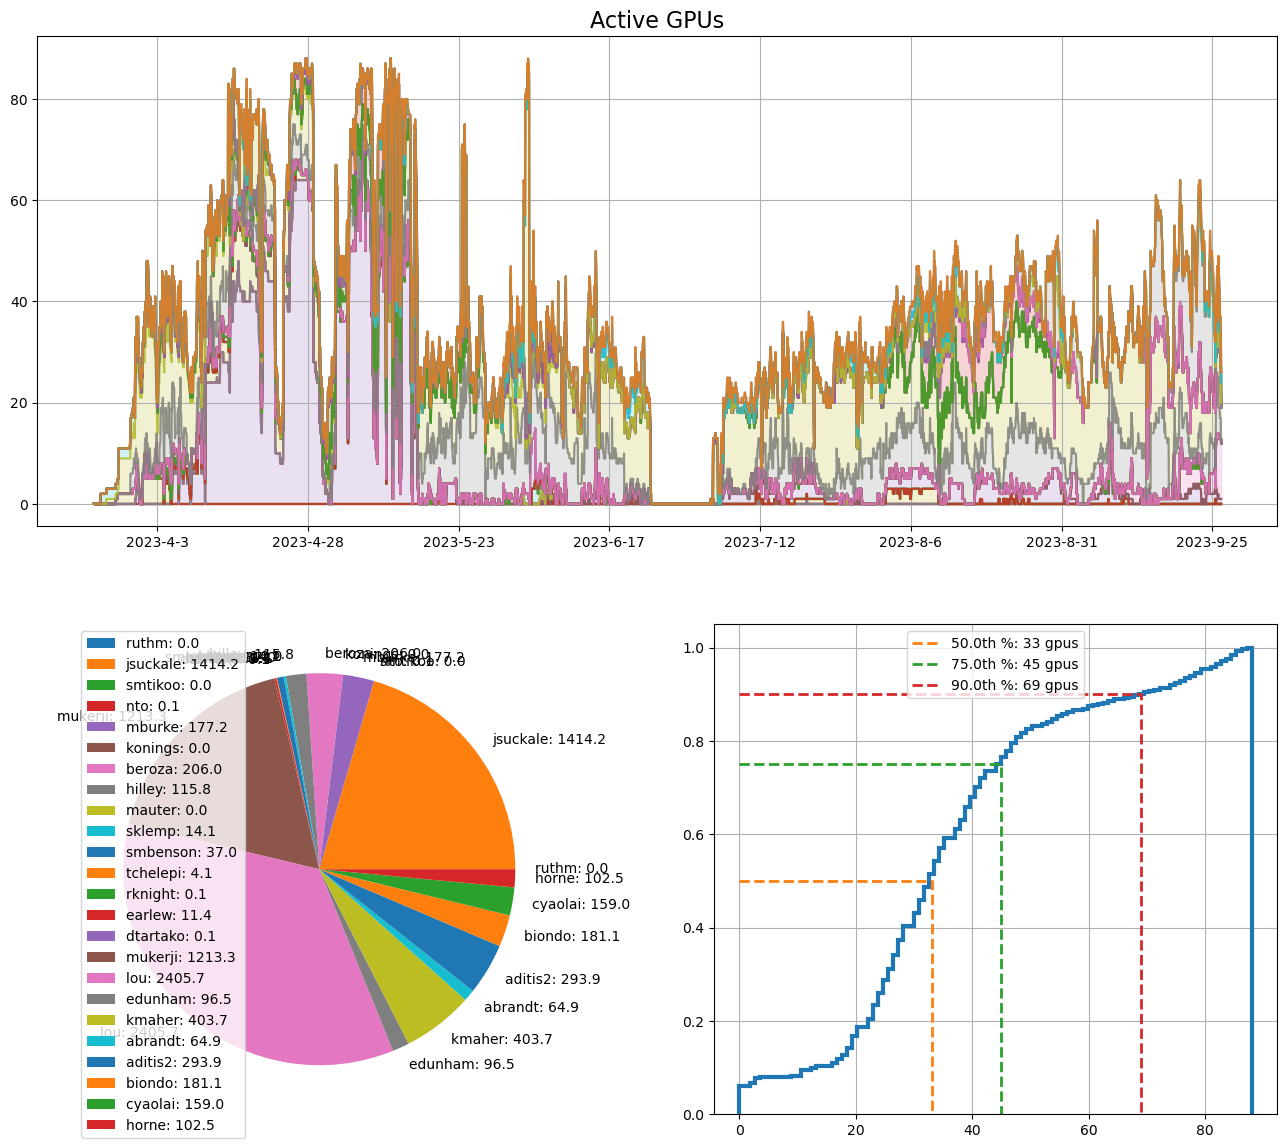

In [26]:
pi_gpu_grps = [s for s in gpu_layers['N_cpu'].dtype.names[1:]]
#print(f'** {pi_gpu_lbls}' )
#
NGPU = SACCT_serc.get_NGPUs()
#
#pi_gpu_vals = numpy.zeros(len(pi_gpu_lbls))
pi_gpu_vals = []
pi_gpu_lbls = []
for k,g in enumerate(pi_gpu_grps):
    ix = SACCT_serc.jobs_summary['Group'].astype(str)==g
    #
    n_gpus = numpy.sum(SACCT_serc.jobs_summary['Elapsed'][ix] * NGPU[ix])
    if n_gpus <= 0.:
        continue
    #
    pi_gpu_vals += [n_gpus]
    pi_gpu_lbls += [f'{g}: {pi_gpu_vals[-1]:.1f}']
#
#print('** vals: ', pi_gpu_vals)
#pi_gpu_lbls = [f'{s}: {v:.1f}' for s,v in zip(pi_gpu_lbls, pi_gpu_vals) ]


fg = plt.figure(figsize=(16,14))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,2,3)
ax3 = fg.add_subplot(2,2,4)
ax1.grid()
#ax2.grid()
ax3.grid()
#
hpc_lib.plot_layer_cake(gpu_layers['N_cpu'], ax=ax1)
z_gpus = ax1.lines[-1].get_ydata()
qs = [.5, .75, .9]
qs_gpu = numpy.quantile(z_gpus, qs)
#
print('*** keys(): ', gpu_layers.keys())
ax2.pie(pi_gpu_vals, labels=pi_gpu_lbls) 
ax2.legend(loc=0)
#
hh_cpus = ax3.hist(z_gpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_gpu, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} gpus' )

ax1.set_title('Active GPUs', size=16)
ax3.legend(loc=0)


In [27]:
print('** ', gpu_layers['N_cpu'].dtype.names)

**  ('time', 'dekas', 'wellswor', 'ruthm', 'spalumbi', 'jsuckale', 'smtikoo', 'kovscek', 'nto', 'mburke', 'jcaers', 'segall', 'caf', 'sonori', 'konings', 'beroza', 'leift', 'hilley', 'mauter', 'gorelick', 'sklemp', 'ggd', 'iazevedo', 'gorle', 'smbenson', 'tchelepi', 'dlobell', 'jhj1', 'bblock', 'rknight', 'wmao', 'linder', 'aleslieb', 'allcott', 'arrigo', 'earlew', 'oneillm', 'dtartako', 'mukerji', 'lou', 'edunham', 'omramom', 'robertj2', 'dustinms', 'kmaher', 'glucia', 'abrandt', 'welander', 'aditis2', 'biondo', 'cyaolai', 'horne', 'deleo')


In [28]:
cpu_jobs_serc = SACCT_serc.active_jobs_cpu()


In [29]:
serc_cpu_qs = numpy.quantile(cpu_jobs_serc['N_cpu'], [.5, .75, .9])
print('** qs: ', serc_cpu_qs)

** qs:  [3681.5 4469.  5163. ]


In [30]:
print('*** dtypes...: ', SACCT_obj.jobs_summary.dtype.names)

*** dtypes...:  ('index', 'User', 'Group', 'GID', 'Account', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'ReqMem', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')


In [31]:
print('*** ', SACCT_obj['ReqMem'][100:150])

***  [4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09
 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09
 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09
 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09
 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 6.0e+09 6.4e+10 6.4e+10 6.4e+10
 6.4e+10 6.4e+10 6.4e+10 6.4e+10 6.4e+10]


**  [ 0  1  2  3  4  5  6  8  9 10 11 14 15 20 29 32]
***  1663594 8718


/tmp/ipykernel_9572/247879298.py:11: RuntimeWarning: divide by zero encountered in divide
  mem_per_cpu = (SACCT_obj['ReqMem'][ix_cpu] / SACCT_obj['NCPUS'][ix_cpu])/10**9


Text(0.5, 1.0, 'ReqMem/GPU')

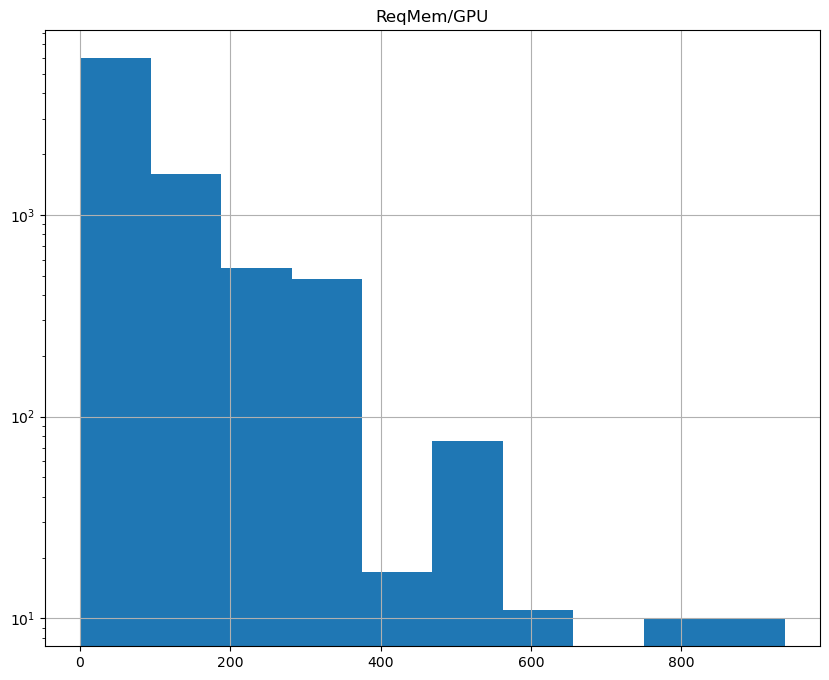

In [43]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['ReqMem']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['ReqMem'][ix_cpu] / SACCT_obj['NCPUS'][ix_cpu])/10**9

req_mem = SACCT_obj['ReqMem']/10**9.
#
fg = plt.figure(figsize=(10,8))
ax1 = fg.add_subplot(1,1,1)
#ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)

##hh_cpu = ax2.hist(mem_per_cpu, bins=20)
#hh_cpu = ax2.hist( (SACCT_obj['ReqMem']/(1024**3)), bins=2)
#
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.grid()
ax2.grid()
#fg.suptitle('Requested Memory', size=16)
ax1.set_title('ReqMem/GPU')

**  [ 0  1  2  3  4  5  6  8  9 10 11 14 15 20 29 32]
***  1663594 8718


Text(0.5, 0.98, 'MaxRSS')

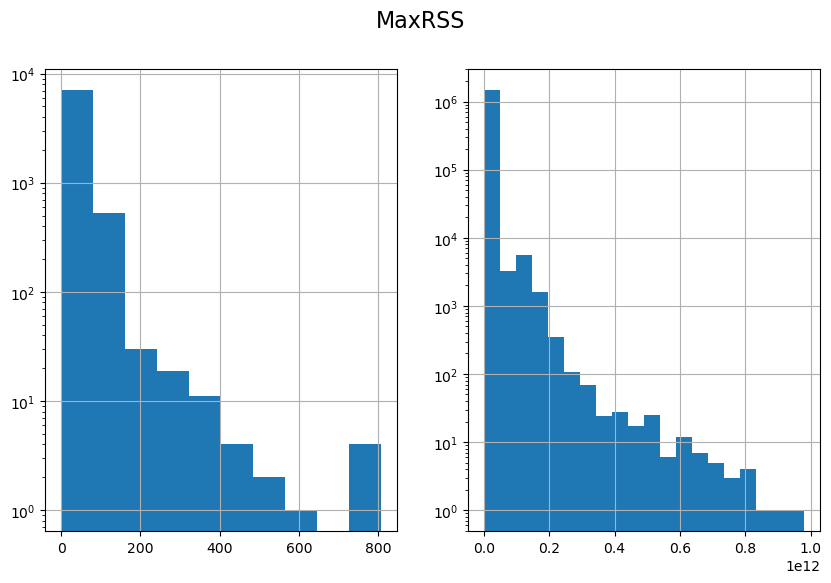

In [44]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['MaxRSS']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['MaxRSS'] / SACCT_obj['NCPUS'])/10**9

req_mem = SACCT_obj['MaxRSS']/1**9.
#
fg = plt.figure(figsize=(10,6))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)
ax1.set_yscale('log')
ax2.set_yscale('log')


#hh_cpu = ax2.hist(mem_per_cpu, bins=20)
hh_cpu = ax2.hist(SACCT_obj['MaxRSS'], bins=20)
#
ax1.grid()
ax2.grid()
fg.suptitle('MaxRSS', size=16)

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3665: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.canvas.draw()


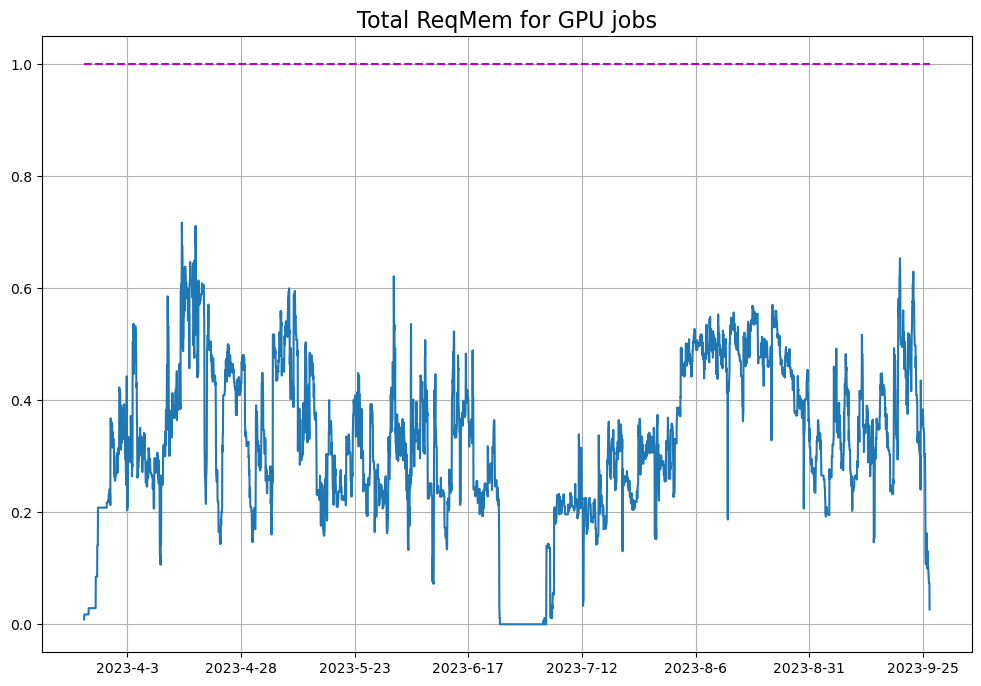

In [45]:
fg = plt.figure(figsize=(12,8))
ax1 = fg.add_subplot(1,1,1)
#
active_req_mem = SACCT_obj.active_jobs_cpu(NCPUs=SACCT_obj['ReqMem'][ix_gpu], jobs_summary=SACCT_obj.jobs_summary[ix_gpu])
ARM = active_req_mem
#
total_mem = 10*1024*1024**3 + 2*192*1024**3
#total_mem = 10*1024*10**9 + 2*192*10**9
#
ax1.plot(ARM['time'], ARM['N_cpu']/total_mem, ls='-')
#
#ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2)*total_mem, ls='--', color='m')
ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2), ls='--', color='m')
ax1.grid()
ax1.set_title('Total ReqMem for GPU jobs', size=16)
lbls = hpc_lib.fg_time_labels_to_dates(ax1)

In [46]:
print('** ', active_req_mem.dtype)

**  [('time', '>f8'), ('N_jobs', '>f8'), ('N_cpu', '>f8')]


### Some Seasonality reports:
NOTE: Some reports being moved to hpc_reports module.

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:1261: UserWarning: FixedFormatter should only be used together with FixedLocator
  #print('*** ', ax.get_xticks() )


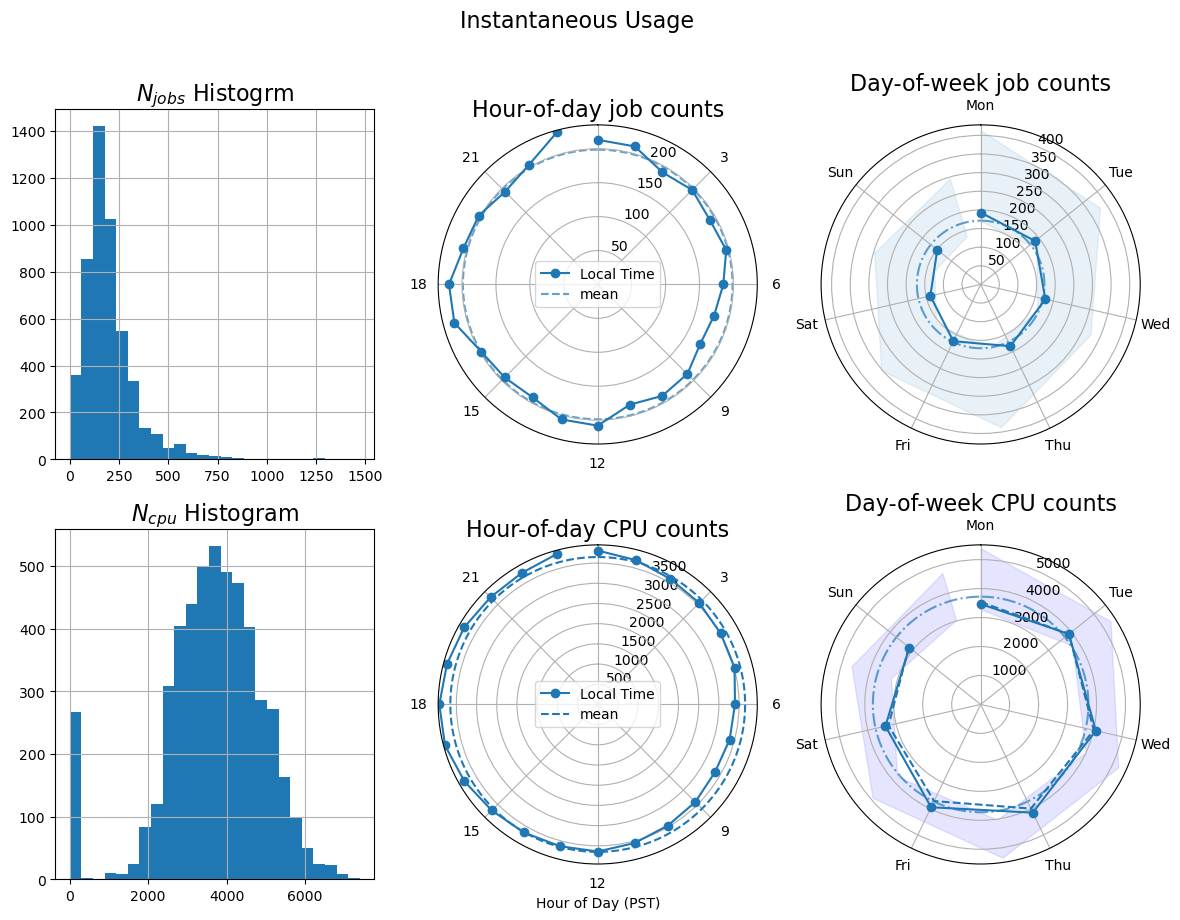

In [49]:
cpu_seasonality = SACCT_obj.active_cpu_jobs_per_day_hour_report(qs=[.45, .5, .9], periodic_projection='polar')

In [50]:
SACCT_rep = hpc_reports.SACCT_report_handler(SACCT_obj=SACCT_obj, Short_title='SERC, 2023-4',
                                Full_title="SERC HPC Analytics, April 2023", out_path='output/SERC_202304',
                                            )

*** DEBUG: q_vals [2714.5  3461.5  4330.25 5340.6 ]
*** DEBUG: q_vals [3247.5 3799.  4634.  5329.8]
*** DEBUG: q_vals [3491.5 4040.5 4786.  5212.1]
*** DEBUG: q_vals [3363. 4120. 4811. 5307.]
*** DEBUG: q_vals [2978.75 3880.5  4457.75 4954.3 ]
*** DEBUG: q_vals [2624.   3286.5  4014.25 4549.8 ]
*** DEBUG: q_vals [2545.75 3107.   4018.75 4724.2 ]
** ** DEBUG:  ['19425', '19450', '19475', '19500', '19525', '19550', '19575', '19600', '19625', '19650']


/home/users/myoder96/Codes/HPC_analytics/hpc_reports.py:258: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(lbls)
/home/users/myoder96/Codes/HPC_analytics/hpc_reports.py:303: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


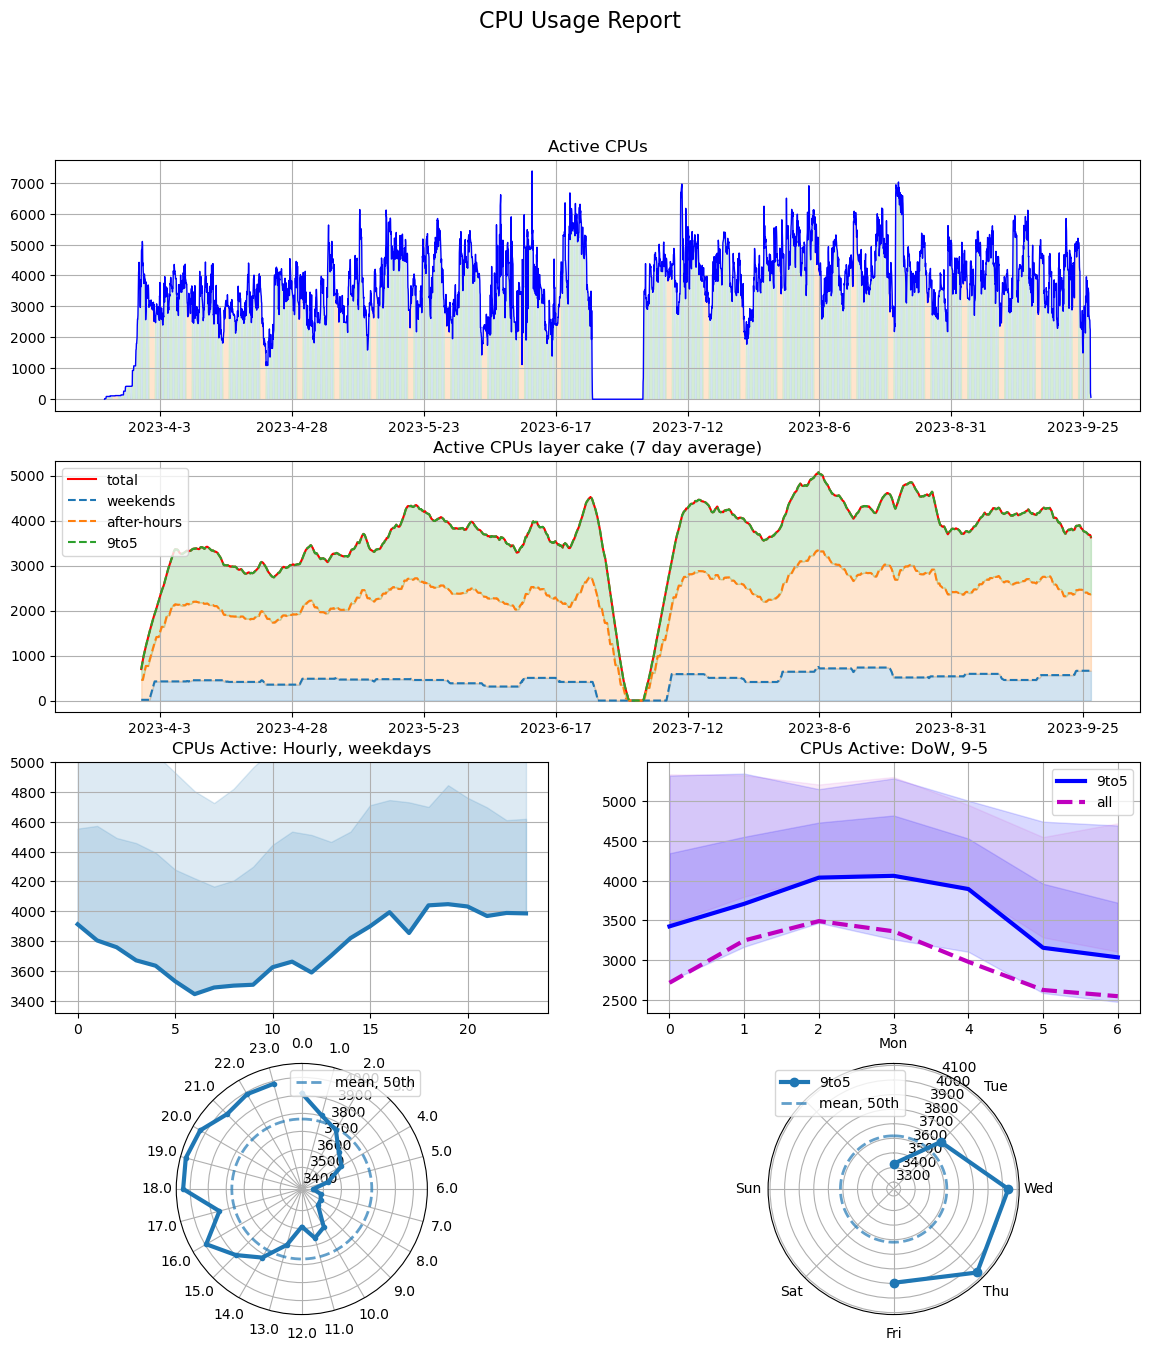

In [51]:
zz = SACCT_rep.cpu_hourly_activity_report()

In [52]:
print(mem_per_cpu[0:500])

[5.42250000e-02 1.19837222e+01 3.62135000e-02 2.44650000e-02
 2.83730000e-02 2.51540000e-02 2.57960000e-02 2.44815000e-02
 2.63590000e-02 2.83395000e-02 2.71630000e-02 2.86955000e-02
 1.98645000e-02 2.67650000e-02 2.81415000e-02 2.60940000e-02
 2.71235000e-02 2.54150000e-02 2.42450000e-02 2.91590000e-02
 2.55115000e-02 2.25100000e-02 2.72010000e-02 2.59975000e-02
 2.81440000e-02 2.66555000e-02 2.61525000e-02            nan
 5.30000000e-05 5.10000000e-05 5.10000000e-05 2.69070000e-02
 2.89495000e-02 2.63955000e-02 2.66460000e-02 5.95000000e-05
 7.37478640e+00 7.57500190e+00 1.10033116e+01 3.54215917e-02
 7.58256667e-03 1.05718750e-02 1.05716250e-02 1.34583750e-02
 1.34719375e-02 1.05723125e-02 1.05712500e-02 1.05718125e-02
 1.05714375e-02 1.05724375e-02 1.05715625e-02 1.08443750e-02
 1.05717500e-02 1.05717500e-02 1.05716875e-02 1.34716875e-02
 1.05718750e-02 1.34758750e-02 1.19690000e-02 1.05713125e-02
 1.05716250e-02 1.09031875e-02 1.05713750e-02 1.05717500e-02
 1.05718750e-02 1.298975

##  A Group report:
- specify group; all partitions.

In [53]:
grp_group='oneillm'
grp_partition=None
SACCT_obj_grp = hpc_lib.SACCT_data_direct(group=grp_group, partition=grp_partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)

***  2023-03-30 00:00:00+00:00 <class 'datetime.datetime'> 2023-09-26 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --group=oneillm  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  23601 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3069: RuntimeWarning: All-NaN slice encountered
  cls = [n1 for n1, n2, f in js_col_f]
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2891: RuntimeWarning: All-NaN slice encountered
  ('NNodes',    'NNodes', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:2891: RuntimeWarning: invalid value encountered in cast
  ('NNodes',    'NNodes', lambda x: numpy.nanmax(x).astype(int)),\


*** DEBUG t_now: 19626.552205783762, t_max: 19625.896481481483


/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3497: UserWarning: FixedFormatter should only be used together with FixedLocator
  lbls = [simple_date_string(mpd.num2date(x + dt_epoch) ) for x in ax.get_xticks()]


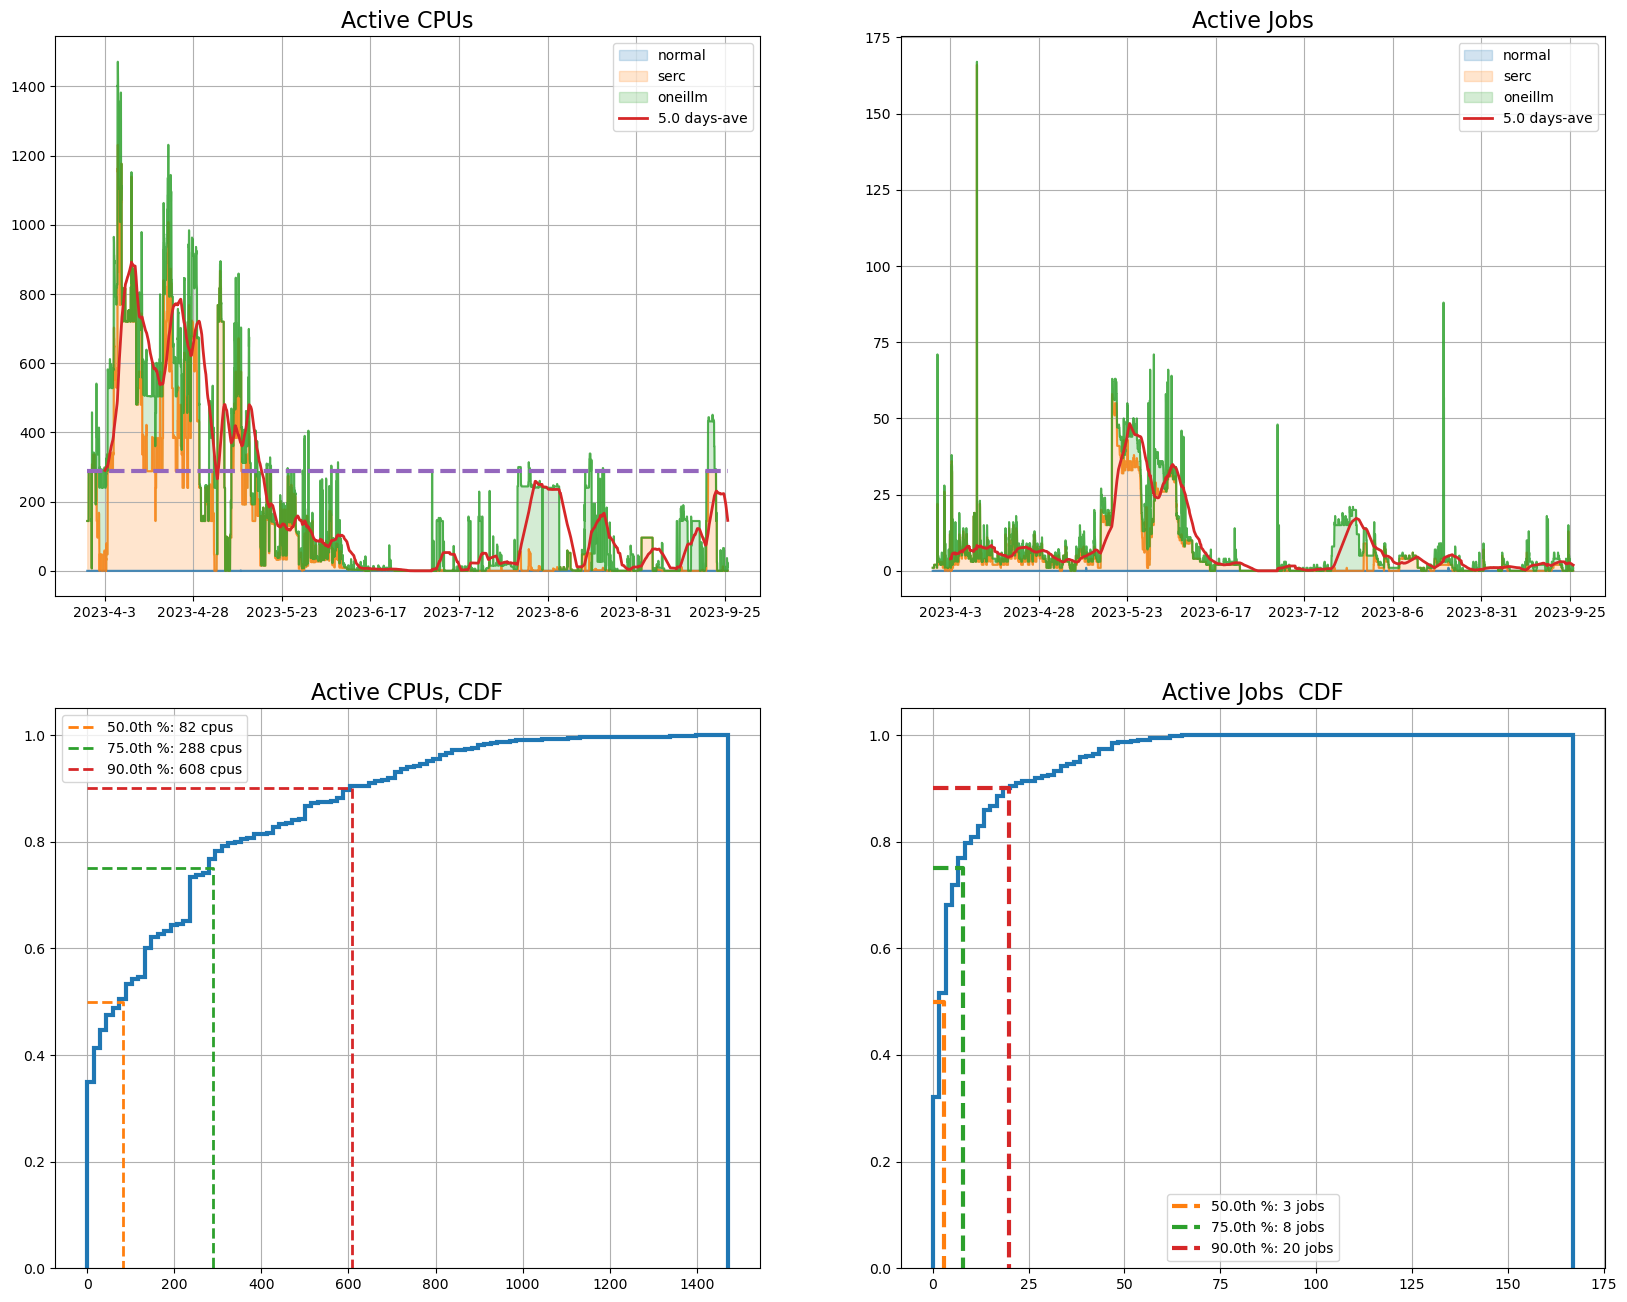

In [54]:
fg_cpu_lc_acct = SACCT_obj_grp.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')

ax = fg_cpu_lc_acct.axes[0]
ln_ = ax.lines[0]
X = ln_.get_xdata()
#
ax.plot(X[0::(len(X)-1)], (12*24)*numpy.ones(2), ls='--', lw=3)

In [55]:
print('** ', len(X))
print('** ', X[0::len(X)-1])

**  5000
**  [19445.02481481 19625.89648148]


In [56]:
ln_ = ax.lines[0]
X = ln_.get_xdata()


Text(0.5, 0, '$MaxRSS/ReqMEM$')

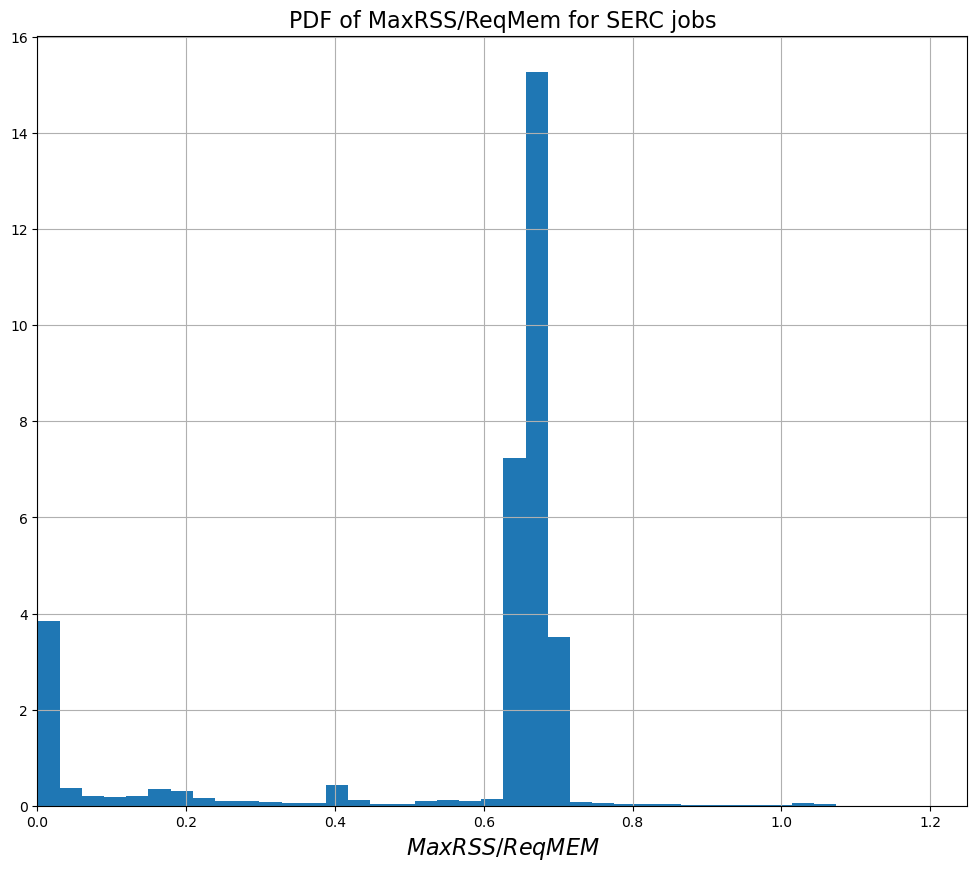

In [69]:
fg = plt.figure(figsize=(12,10))
ax = fg.add_subplot(1,1,1)
#
zz = ax.hist(SACCT_obj['MaxRSS']/SACCT_obj['ReqMem'], bins=100, density=True)
ax.set_xlim(0., 1.25)
ax.grid()
ax.set_title('PDF of MaxRSS/ReqMem for SERC jobs', size=16)
ax.set_xlabel('$MaxRSS/ReqMEM$', size=16)

In [62]:
print('** ', SACCT_obj['ReqMem'][0:20])
print('** ', SACCT_obj['MaxRSS'][0:20])

**  [2.0e+09 2.5e+11 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10
 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10 1.6e+10
 1.6e+10 1.6e+10]
**  [5.42250000e+07 2.39674443e+11 7.24270000e+07 4.89300000e+07
 5.67460000e+07 5.03080000e+07 5.15920000e+07 4.89630000e+07
 5.27180000e+07 5.66790000e+07 5.43260000e+07 5.73910000e+07
 3.97290000e+07 5.35300000e+07 5.62830000e+07 5.21880000e+07
 5.42470000e+07 5.08300000e+07 4.84900000e+07 5.83180000e+07]
